#                    [ MODEL-1 ] CROP RECOMMENDATION 

# REQUIRED LIBRARIES

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import random

# DATA PRE-PROCESSING

In [5]:
df = pd.read_csv("C:/Users/LENOVO/Desktop/sample datasets/crop_recommendation.csv")
print(df.head(10))


    N   P   K  temperature   humidity        ph    rainfall   EC  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  3.5   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  3.5   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  3.5   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  3.5   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  3.5   
5  69  37  42    23.058049  83.370118  7.073454  251.055000  3.5   
6  69  55  38    22.708838  82.639414  5.700806  271.324860  3.5   
7  94  53  40    20.277744  82.894086  5.718627  241.974195  3.5   
8  89  54  38    24.515881  83.535216  6.685346  230.446236  3.5   
9  68  58  38    23.223974  83.033227  6.336254  221.209196  3.5   

                    soil_type  soil_moisture label  
0  Clay loam, silty clay loam           35.0  rice  
1  Clay loam, silty clay loam           35.0  rice  
2  Clay loam, silty clay loam           35.0  rice  
3  Clay loam, silty clay loam          

In [6]:
df.size

24200

In [7]:
df.shape

(2200, 11)

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'EC',
       'soil_type', 'soil_moisture', 'label'],
      dtype='object')

In [9]:
df.isnull().sum()

N                0
P                0
K                0
temperature      0
humidity         0
ph               0
rainfall         0
EC               0
soil_type        0
soil_moisture    0
label            0
dtype: int64

In [10]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Split the comma-separated values into lists
df["categories_split"] = df["soil_type"].apply(lambda x: x.split(','))

# Step 2: Apply MultiLabel Binarizer
mlb = MultiLabelBinarizer()
encoded = pd.DataFrame(mlb.fit_transform(df['categories_split']), columns=mlb.classes_)

# Step 3: Combine the encoded values with the original data
df = pd.concat([df, encoded], axis=1)

print(df)


        N   P   K  temperature   humidity        ph    rainfall    EC  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536  3.50   
1      85  58  41    21.770462  80.319644  7.038096  226.655537  3.50   
2      60  55  44    23.004459  82.320763  7.840207  263.964248  3.50   
3      74  35  40    26.491096  80.158363  6.980401  242.864034  3.50   
4      78  42  42    20.130175  81.604873  7.628473  262.717340  3.50   
...   ...  ..  ..          ...        ...       ...         ...   ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  1.75   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  1.75   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  1.75   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  1.75   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  1.75   

                       soil_type  soil_moisture  ...  well-drained loamy soil  \
0     Clay loam, silty clay loam          

#   LABEL ENCODING OF THE CROP CATEGORY COLUMN ################

In [13]:
le=LabelEncoder()

df["crop_label"]=le.fit_transform(df["label"])

df2 = df.copy()

print(df2.head(20))

     N   P   K  temperature   humidity        ph    rainfall   EC  \
0   90  42  43    20.879744  82.002744  6.502985  202.935536  3.5   
1   85  58  41    21.770462  80.319644  7.038096  226.655537  3.5   
2   60  55  44    23.004459  82.320763  7.840207  263.964248  3.5   
3   74  35  40    26.491096  80.158363  6.980401  242.864034  3.5   
4   78  42  42    20.130175  81.604873  7.628473  262.717340  3.5   
5   69  37  42    23.058049  83.370118  7.073454  251.055000  3.5   
6   69  55  38    22.708838  82.639414  5.700806  271.324860  3.5   
7   94  53  40    20.277744  82.894086  5.718627  241.974195  3.5   
8   89  54  38    24.515881  83.535216  6.685346  230.446236  3.5   
9   68  58  38    23.223974  83.033227  6.336254  221.209196  3.5   
10  91  53  40    26.527235  81.417538  5.386168  264.614870  3.5   
11  90  46  42    23.978982  81.450616  7.502834  250.083234  3.5   
12  78  58  44    26.800796  80.886848  5.108682  284.436457  3.5   
13  93  56  36    24.014976  82.05

In [14]:
df2.drop(["label","soil_type","categories_split"],axis=1,inplace=True)

In [15]:
df2

,N,P,K,temperature,humidity,ph,rainfall,EC,soil_moisture,acidic soil,...,Alluvial soil,Black cotton soil,Clay loam,Deep,Loam,Loamy soil,Sandy loam,Well-drained,Well-drained loamy soil,crop_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,3.50,35.0,0,...,0,0,1,0,0,0,0,0,0,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,3.50,35.0,0,...,0,0,1,0,0,0,0,0,0,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,3.50,35.0,0,...,0,0,1,0,0,0,0,0,0,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,3.50,35.0,0,...,0,0,1,0,0,0,0,0,0,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,3.50,35.0,0,...,0,0,1,0,0,0,0,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,1.75,22.5,1,...,0,0,0,0,0,0,0,1,0,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,1.75,22.5,1,...,0,0,0,0,0,0,0,1,0,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,1.75,22.5,1,...,0,0,0,0,0,0,0,1,0,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,1.75,22.5,1,...,0,0,0,0,0,0,0,1,0,5


#  normalization of the data ###################

In [16]:
items=df2[["N","P","K","temperature","humidity","ph","rainfall","EC","soil_moisture"]]
ms = MinMaxScaler()

scaled_values = ms.fit_transform(items)
scaled_df = pd.DataFrame(scaled_values, columns=items.columns)

df2[scaled_df.columns] = scaled_df

print(df2)

             N         P      K  temperature  humidity        ph  rainfall  \
0     0.642857  0.264286  0.190     0.345886  0.790267  0.466264  0.656458   
1     0.607143  0.378571  0.180     0.371445  0.770633  0.549480  0.741675   
2     0.428571  0.357143  0.195     0.406854  0.793977  0.674219  0.875710   
3     0.528571  0.214286  0.175     0.506901  0.768751  0.540508  0.799905   
4     0.557143  0.264286  0.185     0.324378  0.785626  0.641291  0.871231   
...        ...       ...    ...          ...       ...       ...       ...   
2195  0.764286  0.207143  0.135     0.515037  0.608410  0.509353  0.566064   
2196  0.707143  0.071429  0.110     0.533473  0.494359  0.401561  0.386972   
2197  0.842857  0.200000  0.125     0.439202  0.617880  0.444433  0.550071   
2198  0.835714  0.192857  0.145     0.500627  0.441760  0.506045  0.384280   
2199  0.742857  0.092857  0.125     0.424029  0.538222  0.509317  0.433721   

            EC  soil_moisture   acidic soil  ...  Alluvial soil

# TRAIN TEST SPLIT

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('crop_label', axis=1),
                                                    df2['crop_label'],
                                                    test_size=0.3,
                                                    random_state=10)

In [18]:
print(X_train)
print(X_test)

             N         P      K  temperature  humidity        ph  rainfall  \
697   0.142857  0.285714  0.060     0.555208  0.810026  0.507936  0.061201   
1033  0.728571  0.471429  0.215     0.568981  0.758586  0.340653  0.295500   
1109  0.214286  0.164286  0.125     0.661144  0.442529  0.242578  0.281145   
1827  0.078571  0.007143  0.100     0.570045  0.961161  0.400728  0.570336   
708   0.192857  0.421429  0.080     0.689141  0.634899  0.628124  0.192063   
...        ...       ...    ...          ...       ...       ...       ...   
2009  0.528571  0.250000  0.175     0.468087  0.803306  0.448111  0.535758   
1180  0.007143  0.171429  0.120     0.530962  0.408818  0.396134  0.263413   
1344  0.735714  0.078571  0.220     0.437352  0.786044  0.530449  0.113314   
527   0.171429  0.228571  0.080     0.624058  0.512913  0.359774  0.152818   
1289  0.271429  0.821429  0.960     0.250164  0.801282  0.438386  0.192418   

            EC  soil_moisture   acidic soil  ...   well-drained

# DATA VISUALIZATION THROUGH GRAPHS AND 3D PLOTS

In [107]:
fig=px.scatter_3d(df,x='N',y='P',z='K')
fig.show()


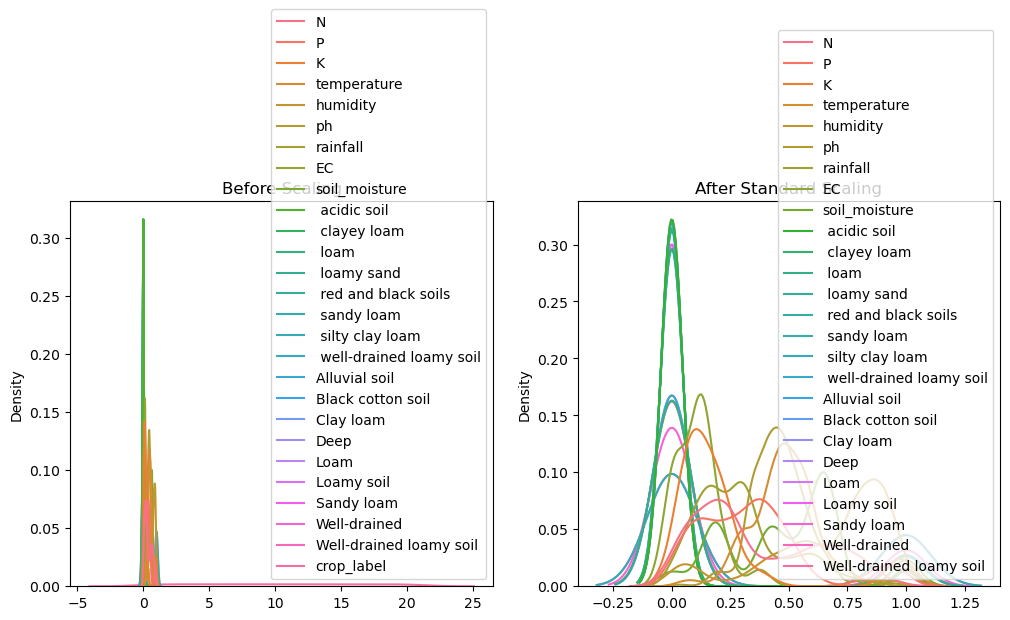

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(df2,ax=ax1)
# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train,ax=ax2)

plt.show()



In [21]:
############ model training ###############

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [112]:
nitrogen = float(input("Enter value of NITROGEN: "))
phosphorus = float(input("Enter value of PHOSPHORUS: "))
pottasium = float(input("Enter value of POTASSIUM: "))
temperature = float(input("Enter value of TEMPERATURE: "))
humidity = float(input("Enter value of HUMIDITY: "))
ph = float(input("Enter value of PH: "))
rainfall = float(input("Enter value of RAINFALL: "))
EC = float(input("Enter value of Electrical Conductivity: "))
soil_moisture= float(input("Enter value of Soil Moisture: "))

print("from the below list enter the type of soil you have:\n")
print("1. Acidic soil\n 2. Aluvial soil\n 3. Black cotton soil\n 4. Clay loam\n 5. Deep\n 6. Loam\n 7. Loamy soil\n 8. Sandy soil\n 9. Well drained\n 10. Well drained loamy soil ")
soil_type_input = input("Enter soil type(s) (comma-separated): ")


soil_type_split = soil_type_input.split(',')  
soil_type_encoded = mlb.transform([soil_type_split])

data = np.array([[nitrogen, phosphorus, pottasium, temperature, humidity, ph, rainfall, EC, soil_moisture]])

final_input = np.hstack((data, soil_type_encoded))

prediction = knn.predict(final_input) 
prediction_final=le.inverse_transform(prediction)

print("Recommended crop according to given data is:",prediction_final )


Enter value of NITROGEN: 32
Enter value of PHOSPHORUS: 12
Enter value of POTASSIUM: 32
Enter value of TEMPERATURE: 30
Enter value of HUMIDITY: 31
Enter value of PH: 4
Enter value of RAINFALL: 222
Enter value of Electrical Conductivity: 0.4
Enter value of Soil Moisture: 12
from the below list enter the type of soil you have:

1. Acidic soil
 2. Aluvial soil
 3. Black cotton soil
 4. Clay loam
 5. Deep
 6. Loam
 7. Loamy soil
 8. Sandy soil
 9. Well drained
 10. Well drained loamy soil 
Enter soil type(s) (comma-separated): loam
Recommended crop according to given data is: ['rice']


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning:

unknown class(es) ['loam'] will be ignored

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



#                             [ MODEL-2 ] FERTILIZER TYPE RECOMMENDATION

# REQUIRED DATASETS

In [37]:
crop_standard_values = {
    "rice": {"N": 150, "P": 60, "K": 60},
    "maize": {"N": 200, "P": 80, "K": 80},
    "chickpea": {"N": 25, "P": 50, "K": 30},
    "kidneybeans": {"N": 50, "P": 70, "K": 40},
    "pigeonpeas": {"N": 30, "P": 50, "K": 40},
    "mothbeans": {"N": 20, "P": 40, "K": 30},
    "mungbean": {"N": 25, "P": 50, "K": 30},
    "blackgram": {"N": 25, "P": 50, "K": 30},
    "lentil": {"N": 25, "P": 60, "K": 30},
    "pomegranate": {"N": 120, "P": 60, "K": 240},
    "banana": {"N": 300, "P": 60, "K": 400},
    "mango": {"N": 150, "P": 50, "K": 200},
    "grapes": {"N": 200, "P": 60, "K": 150},
    "watermelon": {"N": 120, "P": 80, "K": 150},
    "muskmelon": {"N": 120, "P": 80, "K": 150},
    "apple": {"N": 100, "P": 50, "K": 150},
    "orange": {"N": 120, "P": 60, "K": 200},
    "papaya": {"N": 250, "P": 60, "K": 250},
    "coconut": {"N": 200, "P": 60, "K": 300},
    "cotton": {"N": 120, "P": 60, "K": 60},
    "jute": {"N": 100, "P": 30, "K": 50},
    "coffee": {"N": 150, "P": 50, "K": 150}
}


In [38]:
fertilizer_standard_composition={
    "Ammonium Nitrate": {"N": 33, "P": 0, "K": 0},
    "Urea": {"N": 46, "P": 0, "K": 0},
    "Calcium Ammonium Nitrate": {"N": 27, "P": 0, "K": 0},
    "Anhydrous Ammonia": {"N": 82, "P": 0, "K": 0},
    "Ammonium Sulfate": {"N": 21, "P": 0, "K": 0},
    "Sodium Nitrate": {"N": 16, "P": 0, "K": 0},
    "Single Super Phosphate": {"N": 0, "P": 16, "K": 0},
    "Triple Super Phosphate": {"N": 0, "P": 46, "K": 0},
    "Mono Ammonium Phosphate": {"N": 11, "P": 52, "K": 0},
    "Diammonium Phosphate": {"N": 18, "P": 46, "K": 0},
    "Rock Phosphate": {"N": 0, "P": 30, "K": 0},
    "Muriate of Potash": {"N": 0, "P": 0, "K": 60},
    "Sulphate of Potash": {"N": 0, "P": 0, "K": 50},
    "Potassium Nitrate": {"N": 13, "P": 0, "K": 44},
    "Potassium Magnesium Sulphate": {"N": 0, "P": 0, "K": 22},
    "Balanced Formula": {"N": 20, "P": 20, "K": 20},
    "High Nitrogen": {"N": 50, "P": 0, "K": 0},
    "High Phosphorus": {"N": 0, "P": 50, "K": 0},
    "High Potassium": {"N": 0, "P": 0, "K": 60},
    "Osmocote": {"N": 14, "P": 14, "K": 14},
    "Urea Formaldehyde": {"N": 38, "P": 0, "K": 0}

}



In [39]:
# Mapping for each index
index_map = {
    0: "Ammonium Nitrate",
    1: "Urea",
    2: "Calcium Ammonium Nitrate",
    3: "Anhydrous Ammonia",
    4: "Ammonium Sulfate",
    5: "Sodium Nitrate",
    6: "Single Super Phosphate",
    7: "Triple Super Phosphate",
    8: "Mono Ammonium Phosphate",
    9: "Diammonium Phosphate",
    10: "Rock Phosphate",
    11: "Muriate of Potash",
    12: "Sulphate of Potash",
    13: "Potassium Nitrate",
    14: "Potassium Magnesium Sulphate",
    15: "Balanced Formula",
    16: "High Nitrogen",
    17: "High Phosphorus",
    18: "High Potassium",
    19: "Osmocote",
    20: "Urea Formaldehyde"
}


In [40]:
deficiency_dataset=pd.read_csv(r"C:\Users\LENOVO\Desktop\sample datasets\deficiency_dataset.csv",usecols=['deficiency_n','deficiency_p','deficiency_k'])
deficiency_dataset.head(10)

,deficiency_n,deficiency_p,deficiency_k
0,60,18,17
1,65,2,19
2,90,5,16
3,76,25,20
4,72,18,18
5,81,23,18
6,81,5,22
7,56,7,20
8,61,6,22
9,82,2,22


# EVALUATION

In [113]:
recommended_soil=prediction_final.item()
recommended_soil

'rice'

In [114]:
soil_test_values={"N": nitrogen, "P": phosphorus, "K": pottasium}
 # Soil test values
soil_test_n = soil_test_values['N']
soil_test_p = soil_test_values['P']
soil_test_k = soil_test_values['K']

In [115]:
npk_values = crop_standard_values[recommended_soil]
crop_stand_n = npk_values['N']
crop_stand_p = npk_values['P']
crop_stand_k = npk_values['K']

In [116]:
# Calculating nutrient deficiencies
n_deficiency = max(0,crop_stand_n - soil_test_n)
p_deficiency = max(0,crop_stand_p - soil_test_p)
k_deficiency = max(0,crop_stand_k - soil_test_k)
    
print(n_deficiency)
print(p_deficiency)
print(k_deficiency)

118.0
48.0
28.0


#   FINDING THE PRIMARY FERTILIZER

#######################  fit score Calculation ########################

1. comparing the crop's standard NPK values with the soil test NPK values
2. calculating the deficiency
3. calculating fit score(for all the fertilizers) on the basis of NPK deficiencies and fertilizers NPK composition
     fit score formula used:-
     fit score=       deficiency to be covered/ nutrient composition in fertilizer
                   
4. for a deficiency, sort the best fit fertilizers on the basis of fit score 

In [117]:
# Deficiency values in kg/ha
deficiency = {"N": n_deficiency, "P": p_deficiency, "K": k_deficiency}

def calculate_fit(fertilizer, deficiency):
    covered_n = deficiency["N"] * (fertilizer["N"] / 100)
    covered_p = deficiency["P"] * (fertilizer["P"] / 100)
    covered_k = deficiency["K"] * (fertilizer["K"] / 100)
    total_deficiency = sum(deficiency.values())
    return (covered_n + covered_p + covered_k) / total_deficiency

fertilizers_df = pd.DataFrame.from_dict(fertilizer_standard_composition, orient="index")

# Calculate fit score for each fertilizer
fertilizers_df["Fit Score"] = fertilizers_df.apply(lambda x: calculate_fit(x, deficiency), axis=1)

# Determine the nutrient deficiency count
deficiency_count = sum(1 for val in deficiency.values() if val > 0)

# Filter fertilizers based on the conditions
if deficiency_count == 3:
    # At least 2 nutrients must be present
    fertilizers_df = fertilizers_df[(fertilizers_df[['N', 'P', 'K']] > 0).sum(axis=1) >= 2]
elif deficiency_count == 2:
    # At most 2 nutrients must be present
    fertilizers_df = fertilizers_df[(fertilizers_df[['N', 'P', 'K']] > 0).sum(axis=1) <= 2]
elif deficiency_count == 1:
    # Only 1 nutrient must be present
    fertilizers_df = fertilizers_df[(fertilizers_df[['N', 'P', 'K']] > 0).sum(axis=1) == 1]

# Sort by Fit Score
fertilizers_df = fertilizers_df.sort_values(by="Fit Score", ascending=False)

# Select top 3 primary fertilizers
top_fertilizer_names = fertilizers_df.head(3).index.tolist()


print(top_fertilizer_names)


['Diammonium Phosphate', 'Balanced Formula', 'Mono Ammonium Phosphate']


#            [ MODEL-3 ] FERTILIZER QUANTITY RECOMMENDATION

In [118]:
Nitrogen_rich_fertilizer = {
    "Ammonium Nitrate": {"N": 33, "P": 0, "K": 0},
    "Urea": {"N": 46, "P": 0, "K": 0},
    "Calcium Ammonium Nitrate": {"N": 27, "P": 0, "K": 0},
    "Anhydrous Ammonia": {"N": 82, "P": 0, "K": 0},
    "Ammonium Sulfate": {"N": 21, "P": 0, "K": 0},
    "Sodium Nitrate": {"N": 16, "P": 0, "K": 0},
}

Potassium_rich_fertilizer = {
    "Muriate of Potash": {"N": 0, "P": 0, "K": 60},
    "Sulphate of Potash": {"N": 0, "P": 0, "K": 50},
    "Potassium Nitrate": {"N": 13, "P": 0, "K": 44},
    "Potassium Magnesium Sulphate": {"N": 0, "P": 0, "K": 22},
}

phosphorous_rich_fertilizer ={
   "Single Super Phosphate": {"N": 0, "P": 16, "K": 0},
    "Triple Super Phosphate": {"N": 0, "P": 46, "K": 0},
    "Mono Ammonium Phosphate": {"N": 11, "P": 52, "K": 0},
    "Diammonium Phosphate": {"N": 18, "P": 46, "K": 0},
    "Rock Phosphate": {"N": 0, "P": 30, "K": 0},
}

# Function for selecting Nitrogen-rich fertilizers
def n_selection():
    selected_n_fertilizer = random.choice(list(Nitrogen_rich_fertilizer.items()))
    fertilizer_name, npk_values = selected_n_fertilizer
    Selected_n_Fertilizer = fertilizer_name
    N = npk_values['N']
    P = npk_values['P']
    K = npk_values['K']
    return N, P, K, Selected_n_Fertilizer

# Function for selecting Potassium-rich fertilizers
def k_selection():
    selected_k_fertilizer = random.choice(list(Potassium_rich_fertilizer.items()))
    fertilizer_name, npk_values = selected_k_fertilizer
    Selected_k_Fertilizer = fertilizer_name
    N = npk_values['N']
    P = npk_values['P']
    K = npk_values['K']
    return N, P, K, Selected_k_Fertilizer

def p_selection():
    selected_p_fertilizer = random.choice(list(phosphorous_rich_fertilizer.items()))
    fertilizer_name, npk_values = selected_p_fertilizer
    Selected_p_Fertilizer = fertilizer_name
    N = npk_values['N']
    P = npk_values['P']
    K = npk_values['K']
    return N, P, K, Selected_p_Fertilizer


In [119]:
# Main Fertilizer Recommendation Function
def fertilizer_requirement(crop,n_deficiency,p_deficiency,k_deficiency,n_selection,p_selection,k_selection,Nitrogen_rich_fertilizer,Potassium_rich_fertilizer,phosphorous_rich_fertilizer,crop_standard_values, fertilizer_standard_composition, soil_test_values, primary):
    # Fetch crop's standard NPK values
    npk_values = crop_standard_values[crop]
    crop_stand_n = npk_values['N']
    crop_stand_p = npk_values['P']
    crop_stand_k = npk_values['K']
    
    # Soil test values
    soil_test_n = soil_test_values['N']
    soil_test_p = soil_test_values['P']
    soil_test_k = soil_test_values['K']
    
    # Primary fertilizer selection
    primary_npk =fertilizer_standard_composition[primary]
    primary_n = primary_npk["N"]
    primary_p = primary_npk["P"]
    primary_k = primary_npk["K"]
    
    results = []
    batch_1 = []  
    batch_2 = []  
    batch_3 = []
    
    if primary_n and primary_p and primary_k:
        if p_deficiency>0:
            required_primary_fertilizer = p_deficiency / (primary_p / 100)
            results.append(f"{primary}: {required_primary_fertilizer:.2f} kg/hectare")
            n_from_primary_fertilizer = required_primary_fertilizer * (primary_n / 100)
            k_from_primary_fertilizer = required_primary_fertilizer * (primary_k / 100)
            remaining_n_deficiency = max(0, n_deficiency - n_from_primary_fertilizer)
            # Handle nitrogen deficiency
            if remaining_n_deficiency > 0:
                n, _, _, selected_n_fertilizer = n_selection()
                required_n_fertilizer = remaining_n_deficiency / (n/ 100)
                results.append(f"{selected_n_fertilizer}: {required_n_fertilizer:.2f} kg/hectare")
            
            remaining_k_deficiency = max(0, k_deficiency - k_from_primary_fertilizer)
            # Handle potassium deficiency
            if remaining_k_deficiency > 0:
                _, _, k, selected_k_fertilizer = k_selection()
                required_k_fertilizer = remaining_k_deficiency / (k/ 100)
                results.append(f"{selected_k_fertilizer}: {required_k_fertilizer:.2f} kg/hectare")
    
        elif p_deficiency==0 and n_deficiency>0:
            required_primary_fertilizer = n_deficiency / (primary_n / 100)
            results.append(f"{primary}: {required_primary_fertilizer:.2f} kg/hectare")  
            k_from_primary_fertilizer = required_primary_fertilizer * (primary_k / 100)
            remaining_k_deficiency = max(0, k_deficiency - k_from_primary_fertilizer)
            # Handle potassium deficiency
            if remaining_k_deficiency > 0:
                _, _, k, selected_k_fertilizer = k_selection()
                required_k_fertilizer = remaining_k_deficiency / (k/ 100)
                results.append(f"{selected_k_fertilizer}: {required_k_fertilizer:.2f} kg/hectare")
    
        elif p_deficiency==0 and k_deficiency>0:
            required_primary_fertilizer = k_deficiency / (primary_k / 100)
            results.append(f"{primary}: {required_primary_fertilizer:.2f} kg/hectare")  
            n_from_primary_fertilizer = required_primary_fertilizer * (primary_n / 100)
            remaining_n_deficiency = max(0, n_deficiency - n_from_primary_fertilizer)
            # Handle nitrogen deficiency
            if remaining_n_deficiency > 0:
                n, _, _, selected_n_fertilizer = n_selection()
                required_n_fertilizer = remaining_n_deficiency / (n/ 100)
                results.append(f"{selected_n_fertilizer}: {required_n_fertilizer:.2f} kg/hectare")
            
            
    elif primary_n and primary_p and not primary_k:
        if p_deficiency>0:
            required_primary_fertilizer = p_deficiency / (primary_p / 100)
            results.append(f"{primary}: {required_primary_fertilizer:.2f} kg/hectare")    
            n_from_primary_fertilizer = required_primary_fertilizer * (primary_n / 100)
            remaining_n_deficiency = max(0, n_deficiency - n_from_primary_fertilizer)
            # Handle nitrogen deficiency
            if remaining_n_deficiency > 0:
                n, _, _, selected_n_fertilizer = n_selection()
                required_n_fertilizer = remaining_n_deficiency / (n/ 100)
                results.append(f"{selected_n_fertilizer}: {required_n_fertilizer:.2f} kg/hectare")
            
            
        elif p_deficiency==0 and n_deficiency>0:
            required_primary_fertilizer = n_deficiency / (primary_n / 100)
            results.append(f"{primary}: {required_primary_fertilizer:.2f} kg/hectare")    
            p_from_primary_fertilizer = required_primary_fertilizer * (primary_p / 100)
            remaining_p_deficiency = max(0, p_deficiency - p_from_primary_fertilizer) 
            # Handle phosphorous deficiency
            if remaining_p_deficiency > 0:
                _,p, _, selected_p_fertilizer = p_selection()
                required_p_fertilizer = remaining_p_deficiency / (p/ 100)
                results.append(f"{selected_p_fertilizer}: {required_p_fertilizer:.2f} kg/hectare")
            
        
        if k_deficiency>0:
            # Handle potassium deficiency
            _, _, k, selected_k_fertilizer = k_selection()
            required_k_fertilizer = k_deficiency / (k/ 100)
            results.append(f"{selected_k_fertilizer}: {required_k_fertilizer:.2f} kg/hectare")
            
    
    elif not primary_n and primary_p and primary_k:
        if p_deficiency>0:
            required_primary_fertilizer = p_deficiency / (primary_p / 100)
            results.append(f"{primary}: {required_primary_fertilizer:.2f} kg/hectare")  
            k_from_primary_fertilizer = required_primary_fertilizer * (primary_k / 100)
            remaining_k_deficiency = max(0, k_deficiency - k_from_primary_fertilizer)
            # Handle potassium deficiency
            if remaining_k_deficiency > 0:
                _, _, k, selected_k_fertilizer = k_selection()
                required_k_fertilizer = remaining_k_deficiency / (k/100)
                results.append(f"{selected_k_fertilizer}: {required_k_fertilizer:.2f} kg/hectare")
            
        elif p_deficiency==0 and k_deficiency>0:
            required_primary_fertilizer = k_deficiency / (primary_k / 100)
            results.append(f"{primary}: {required_primary_fertilizer:.2f} kg/hectare")    
               
        if n_deficiency>0:
            # Handle nitrogen deficiency
            _, _, n, selected_n_fertilizer = n_selection()
            required_n_fertilizer = n_deficiency / (n/ 100)
            results.append(f"{selected_n_fertilizer}: {required_n_fertilizer:.2f} kg/hectare")
            
        
    elif primary_n and not primary_p and primary_k:
        if n_deficiency>0:
            required_primary_fertilizer = n_deficiency / (primary_n / 100)
            results.append(f"{primary}: {required_primary_fertilizer:.2f} kg/hectare")
            k_from_primary_fertilizer = required_primary_fertilizer * (primary_k / 100)
            remaining_k_deficiency = max(0, k_deficiency - k_from_primary_fertilizer)
            # Handle potassium deficiency
            if remaining_k_deficiency > 0:
                _, _, k, selected_k_fertilizer = k_selection()
                required_k_fertilizer = remaining_k_deficiency / (k/100)
                results.append(f"{selected_k_fertilizer}: {required_k_fertilizer:.2f} kg/hectare")
        elif n_deficiency==0 and k_deficiency>0:
            required_primary_fertilizer = k_deficiency / (primary_k / 100)
            results.append(f"{primary}: {required_primary_fertilizer:.2f} kg/hectare")
            
        if p_deficiency>0:
            # Handle phosphorous deficiency
            _, p,_, selected_p_fertilizer = p_selection()
            required_p_fertilizer = p_deficiency / (p/ 100)
            results.append(f"{selected_p_fertilizer}: {required_p_fertilizer:.2f} kg/hectare")
            
            
    elif primary_n and not primary_p and not primary_k:
        required_primary_fertilizer = n_deficiency / (primary_n / 100)
        results.append(f"{primary}: {required_primary_fertilizer:.2f} kg/hectare")
        
    elif not primary_n and not primary_p and primary_k:
        required_primary_fertilizer = k_deficiency / (primary_k / 100)
        results.append(f"{primary}: {required_primary_fertilizer:.2f} kg/hectare")
        
    elif not primary_n and primary_p and not primary_k:
        required_primary_fertilizer = p_deficiency / (primary_p / 100)
        results.append(f"{primary}: {required_primary_fertilizer:.2f} kg/hectare")
        
    else:
        results.append("Cannot compute fertilizer quantities now.")
        

    #####now divinding the fertilizers into respective batches  ###############

    for rec in results:
        fert_name, quantity_str = rec.split(":")
        quantity = float(quantity_str.strip().split()[0]) 
            
        # Calculate batch quantities
        batch_1.append(f"{fert_name.strip()}: {quantity * 0.2:.2f} kg/hectare")
        batch_2.append(f"{fert_name.strip()}: {quantity * 0.5:.2f} kg/hectare")
        batch_3.append(f"{fert_name.strip()}: {quantity * 0.3:.2f} kg/hectare")
        
       
    return results, batch_1, batch_2, batch_3


# for each primary fertilizer we will combine it with secondary and tertiary fertilizer to complete its deficiencies and furthur divide them into respective batches

In [122]:
for j, primary in enumerate(top_fertilizer_names, start=1):
    print(f"FERTILIZER RECOMMENDATION {j}:")
    
    fert, batch_1, batch_2, batch_3 = fertilizer_requirement(
        recommended_soil,
        n_deficiency,
        p_deficiency,
        k_deficiency,
        n_selection,
        p_selection,
        k_selection,
        Nitrogen_rich_fertilizer,
        Potassium_rich_fertilizer,
        phosphorous_rich_fertilizer,
        crop_standard_values,
        fertilizer_standard_composition,
        soil_test_values,
        primary,
    )
    
    # overall fertilizer recommendations
    print("\n".join(fert))
    
    # batch-wise quantities
    print("\nBatch-1 Quantities:")
    print("\n".join(batch_1))
    
    print("\nBatch-2 Quantities:")
    print("\n".join(batch_2))
    
    print("\nBatch-3 Quantities:")
    print("\n".join(batch_3))
    
    print()
    print()
    print()

FERTILIZER RECOMMENDATION 1:
Diammonium Phosphate: 104.35 kg/hectare
Sodium Nitrate: 620.11 kg/hectare
Potassium Magnesium Sulphate: 127.27 kg/hectare

Batch-1 Quantities:
Diammonium Phosphate: 20.87 kg/hectare
Sodium Nitrate: 124.02 kg/hectare
Potassium Magnesium Sulphate: 25.45 kg/hectare

Batch-2 Quantities:
Diammonium Phosphate: 52.17 kg/hectare
Sodium Nitrate: 310.06 kg/hectare
Potassium Magnesium Sulphate: 63.63 kg/hectare

Batch-3 Quantities:
Diammonium Phosphate: 31.30 kg/hectare
Sodium Nitrate: 186.03 kg/hectare
Potassium Magnesium Sulphate: 38.18 kg/hectare



FERTILIZER RECOMMENDATION 2:
Balanced Formula: 240.00 kg/hectare
Ammonium Nitrate: 212.12 kg/hectare

Batch-1 Quantities:
Balanced Formula: 48.00 kg/hectare
Ammonium Nitrate: 42.42 kg/hectare

Batch-2 Quantities:
Balanced Formula: 120.00 kg/hectare
Ammonium Nitrate: 106.06 kg/hectare

Batch-3 Quantities:
Balanced Formula: 72.00 kg/hectare
Ammonium Nitrate: 63.64 kg/hectare



FERTILIZER RECOMMENDATION 3:
Mono Ammonium P